In [1]:
import numpy as np
import pandas as pd
from striplog import Legend
import missingno as msno
import welly
import matplotlib.pyplot as plt

### Load training data (from the starter notebook)

In [2]:
# this bit thanks to Brendon Hall
s3_train_csv = 's3://zarr-depot/wells/FORCE: Machine Predicted Lithology/train.csv'
data = pd.read_csv(s3_train_csv, sep=';')

I am using the library `missingno` to make a quick visual summary plot of the dataset completion, log by log (all wells together).

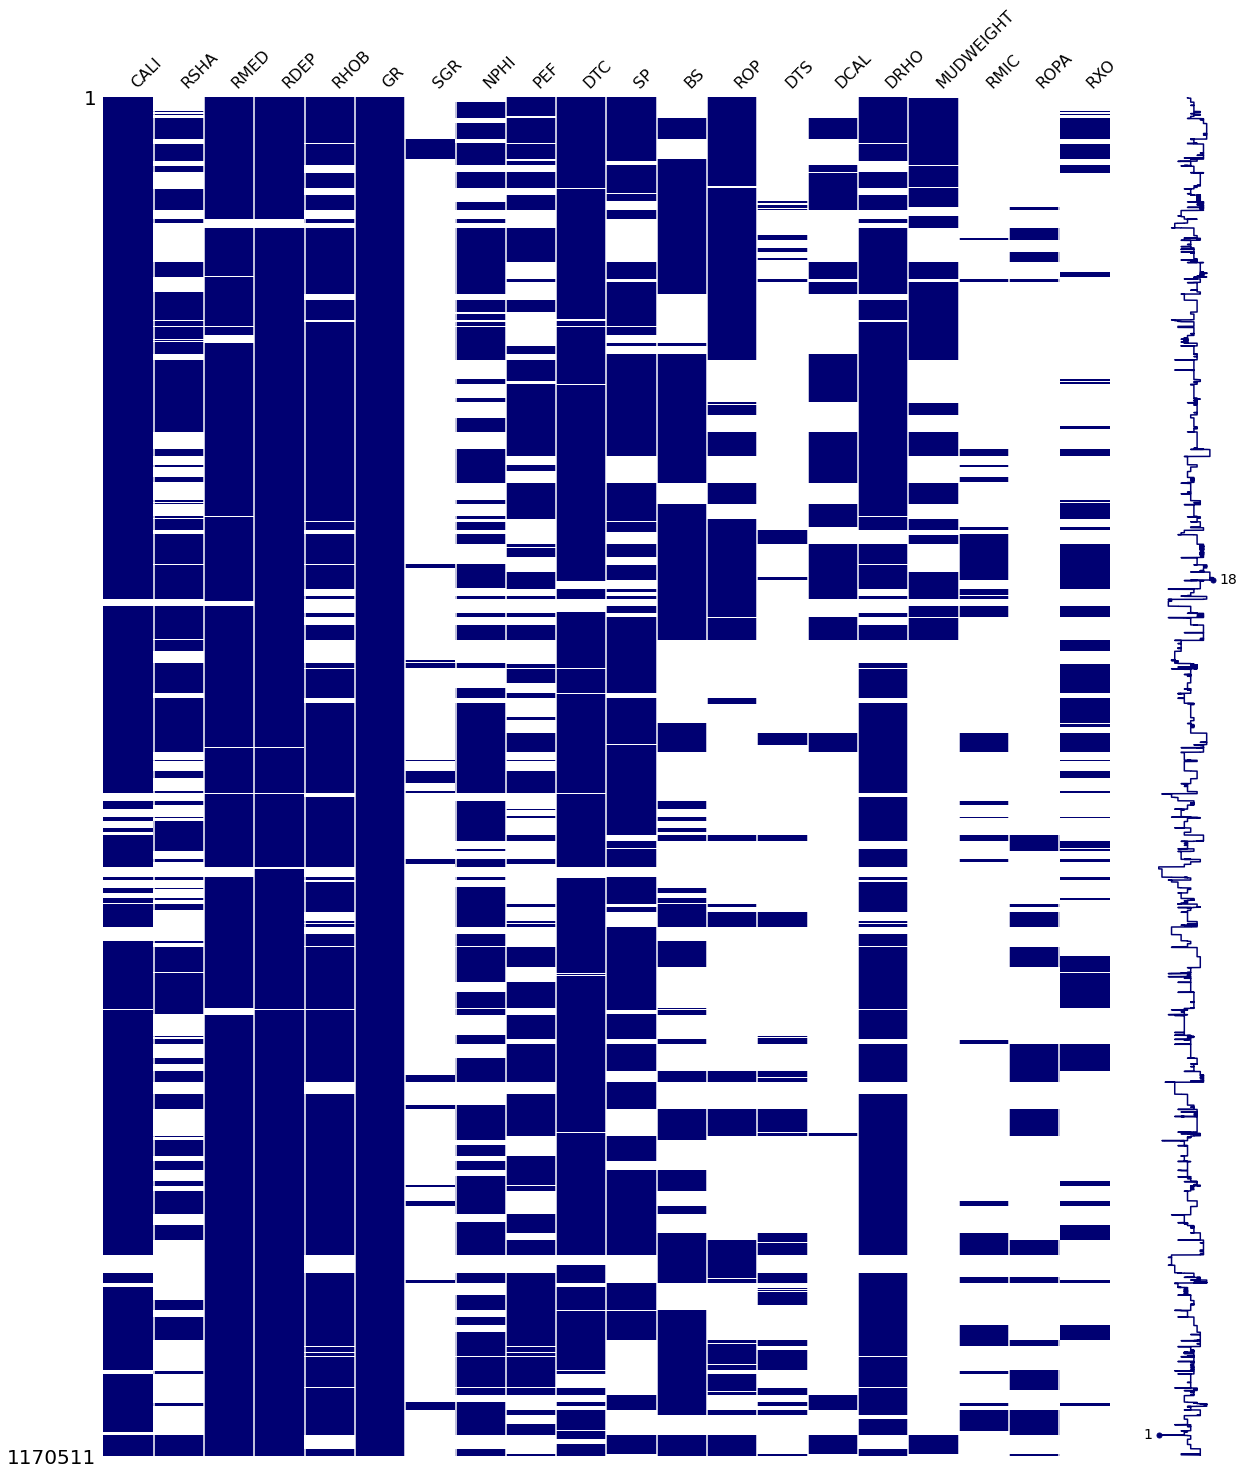

In [3]:
w = data.drop(['WELL', 'DEPTH_MD','X_LOC','Y_LOC','Z_LOC','GROUP','FORMATION',
                       'FORCE_2020_LITHOFACIES_LITHOLOGY','FORCE_2020_LITHOFACIES_CONFIDENCE'], 
                      axis=1)
msno.matrix(w, color=(0., 0., 0.45))   
fig = plt.gcf()
fig.set_size_inches(20, 25)
plt.show()

As explained in the library's documentation, the sparkline at the right of the plot summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset. 

To explore in more depth the data completion, below I am also adding below `missingno` 's dendrogram plot.

As explained in the library's documentation, _The dendrogram uses a hierarchical clustering algorithm (courtesy of scipy) to bin variables against one another by their nullity correlation (measured in terms of binary distance). At each step of the tree the variables are split up based on which combination minimizes the distance of the remaining clusters. The more monotone the set of variables, the closer their total distance is to zero, and the closer their average distance (the y-axis) is to zero._

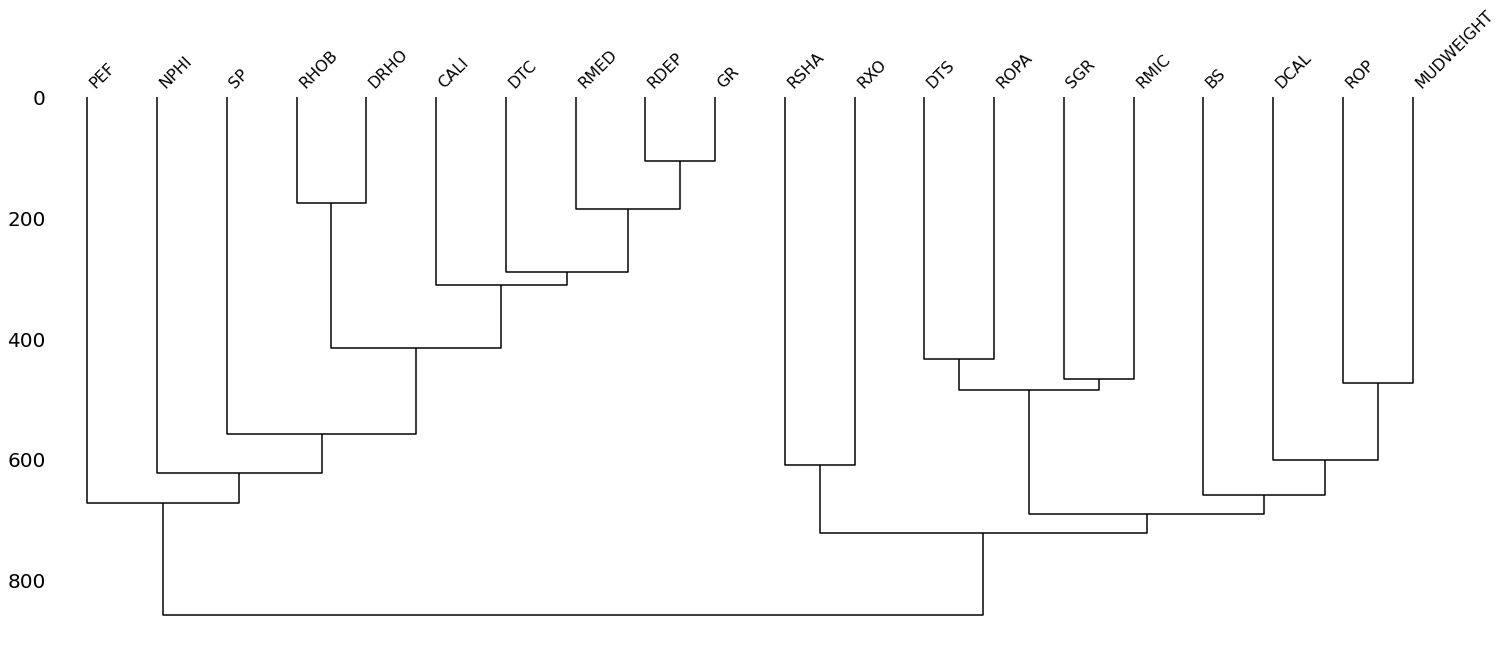

In [4]:
msno.dendrogram(data.drop(['WELL', 'DEPTH_MD','X_LOC','Y_LOC','Z_LOC','GROUP','FORMATION',
                         'FORCE_2020_LITHOFACIES_LITHOLOGY','FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1));

These two plots provide in my opinion a very compelling and informative way to inspect data completeness, and I am wondering if they could inform and guide the strategy to deal with missing data, together with domain knowledge from petrophysics.

Interpreting the dendrogram in a top-down fashion, as suggested in the library documentation, my first thoguths are that this may suggest trying to predict missing values in a sequential fashion rather than for all logs at once.  For example, looking at the largest cluster on the left, and starting from top right, I am thinking of testing use of GR to first predict missing values in RDEP, then both to predict missing values in RMED, then DTC. Then add CALI and use all logs completed so far to predict RHOB, and so on. 

Naturally, this strategy will need to be tested against alternative strategies using lithology prediction accuracy. I would do that in the context of learning curves: I am imagining comparing the training and crossvalidation error first using only non NaN rows, then replace all NANs with mean, then compare separately this sequential log completing strategy with an all-in one strategy.

Stay tuned....